In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [4]:
import plotly.graph_objects as go
import plotly.express as px

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data - EDA/Mental Health Dataset.csv')

In [6]:
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [7]:
df = df.dropna()

In [8]:
df.nunique()

,0
posts,10391
predicted,4
intensity,4


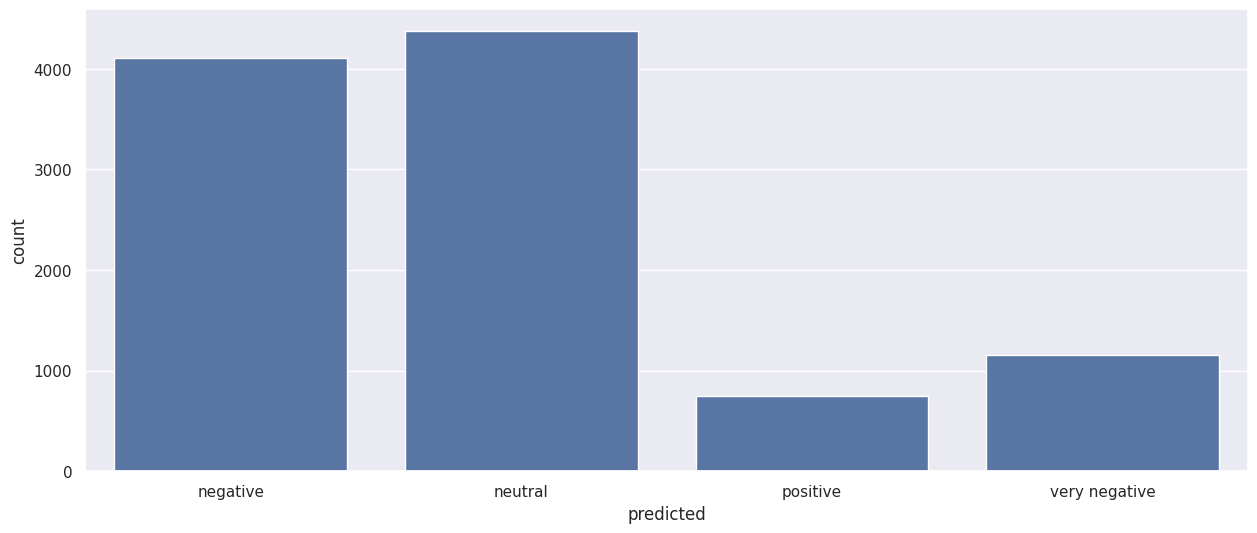

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = df['predicted'])
plt.show()

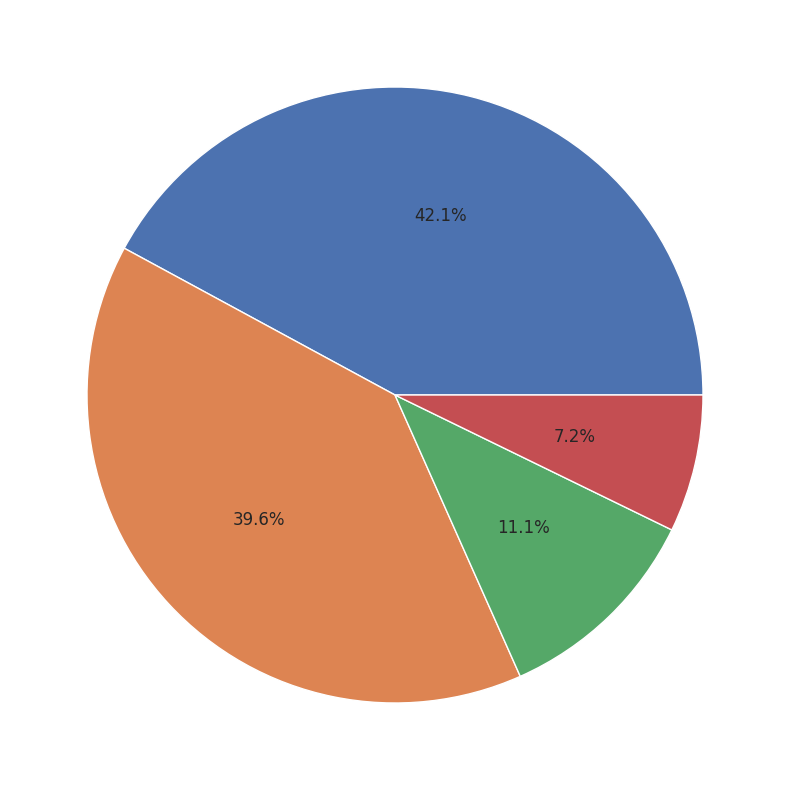

In [10]:
plt.figure(figsize=(15,10))
plt.pie(df['predicted'].value_counts(), autopct='%0.1f%%')
plt.show()

In [11]:
df1 = df.copy()

In [12]:
def text_lower(a):
    lower_text = a.lower()
    return lower_text.strip()

In [13]:
df1['posts'] = df1['posts'].apply(lambda x: text_lower(x))

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def punctuation_remover(a):
    No_spl = ''.join([i for i in a if i not in string.punctuation])
    return No_spl

In [16]:
df1['posts'] = df1['posts'].apply(lambda x: punctuation_remover(x))

In [17]:
import nltk

In [18]:
from nltk.corpus import stopwords

In [19]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def stopword_remover(a):
  stopword_removed = ' '.join([i for i in a.split() if i not in stopwords])
  return stopword_removed

In [22]:
df1['posts'] = df1['posts'].apply(lambda x: stopword_remover(x))


In [23]:
df1['posts'].head()

,posts
0,know parent child syndrome hear child high ris...
1,heart know future promise article regardless h...
2,mylefibrosis turn leukemia want stem cell tran...
3,one health group subject wayne dyer leukemia c...
4,gmos link leukemia http nsnbc 2013 07 17 gmo l...


In [24]:
import re

In [25]:
def digit_remover(a):
  digit_removed = re.sub('[^a-z]+',' ',a)
  return digit_removed

In [26]:
df1['posts'] = df1['posts'].apply(lambda x: digit_remover(x))

In [27]:
df1['posts'].head()

,posts
0,know parent child syndrome hear child high ris...
1,heart know future promise article regardless h...
2,mylefibrosis turn leukemia want stem cell tran...
3,one health group subject wayne dyer leukemia c...
4,gmos link leukemia http nsnbc gmo link leukemi...


In [28]:
from nltk.stem import WordNetLemmatizer

In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
def lemm_text(a):
  text_lemmed = ' '.join([lemmatizer.lemmatize(i) for i in a.split()])
  return text_lemmed

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [32]:
df1['posts'] = df1['posts'].apply(lambda x: lemm_text(x))

In [33]:
df1['posts'].head()

,posts
0,know parent child syndrome hear child high ris...
1,heart know future promise article regardless h...
2,mylefibrosis turn leukemia want stem cell tran...
3,one health group subject wayne dyer leukemia c...
4,gmos link leukemia http nsnbc gmo link leukemi...


Preprocessing
1) lower case
2) removing spl characters
3) removing stopwordds
4) removing digits
5) lemmatizing of words

## Preprocessing in one go

In [34]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.0 MB/s eta 0:00:00


In [35]:
from tqdm import tqdm
import contractions
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
wordnet = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
preprocessed_reviews = []

In [37]:
for sentence in tqdm(df1['posts'].values):
  sentence = contractions.fix(sentence)
  sentence = BeautifulSoup(sentence,'lxml').get_text()
  sentence = re.sub(r'https\S+', '', sentence)
  sentence = re.sub('\S*\d\S*','',sentence).strip()
  sentence = re.sub('[^a-zA-Z\S]+','',sentence)
  tokens = sentence.split()
  tokens = [wordnet.lemmatize(word) for word in tokens if word.lower() not in stopwords]
  cleaned_sentence = ' '.join(tokens).lower()
  preprocessed_reviews.append(cleaned_sentence.strip())

100%|██████████| 10391/10391 [00:12<00:00, 801.17it/s]


In [38]:
preprocessed_reviews

['knowparentchildsyndromehearchildhighriskleukemiaparentreadsaywellhappenchildwellturnyroldstartbruisethoughtleukemiabreaflycrossmindquicklypushmindrationalizesayroughplayingyroldnormalbruisegoworkmonthgetlittlefussywhinnynormalrightwellgetsicklikelotchildgetsickgetsicktakedocfridaysaycoldtellbossicksurpisecallsayhospitalofftengetsicksayoksitgetsureenoughmuchsickertakeertellrsvsendhomemedtimegethomemuchbadtakebacktimeordertestputhospitalworldstartcomearoundfirstsaybloodworkcomebackbadwantretestprobleynothingcomebacksaywantmoveicukeepwellstartgetscaredthoughtcomebackleukemiaputtrypushmindonewantthinkbadwelllongdoccomesaybelievewilliamleukemiaquicklyflybeaumonttxhoustontxtexaschildrenshospitalreallywellremisionstillyrchemorunaroundwalkanymoredueonechemosvinchristincomebackfindwaygetaroundnothinggoslowdowwritesaypleasedwellseesymptomleukemiachildpleasegetcheckwellfindlookfindlikeparenttalkaccident',
 'heartknowfuturepromisearticleregardlesshttpottawactvnewottawaresearcherhopefulnanopartic

In [39]:
len(preprocessed_reviews)

10391

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [61]:
tfvectorizer = TfidfVectorizer(max_features=2000)
tfvectorizer.fit(preprocessed_reviews)
vector_output = tfvectorizer.transform(preprocessed_reviews)

In [62]:
vector_output.toarray

<bound method _cs_matrix.toarray of <10391x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2064 stored elements in Compressed Sparse Row format>>

In [63]:
vector_output = tfvectorizer.transform(preprocessed_reviews).toarray()

In [64]:
vector_output.shape

(10391, 2000)

In [65]:
vector_output = pd.DataFrame(vector_output)

In [66]:
vector_output.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df1.head()

,posts,predicted,intensity
0,know parent child syndrome hear child high ris...,negative,-1
1,heart know future promise article regardless h...,neutral,0
2,mylefibrosis turn leukemia want stem cell tran...,negative,-1
3,one health group subject wayne dyer leukemia c...,neutral,0
4,gmos link leukemia http nsnbc gmo link leukemi...,neutral,0


In [68]:
x = vector_output
y = df1['predicted']

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
label = LabelEncoder()
y_label = label.fit_transform(y)
y_label

array([0, 1, 0, ..., 1, 1, 0])

In [71]:
y.value_counts()

,count
predicted,
neutral,4374
negative,4112
very negative,1155
positive,750


In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_label, train_size= 0.80, random_state= 42, stratify=y)

In [73]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [74]:
y_pred_train = bnb.predict(x_train)
y_pred_test = bnb.predict(x_test)

In [78]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [77]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("*************"*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.49085659287776706
**********************************************************************************************************************************
Test Accuracy : 0.4054834054834055
